# Direct forecasting

Direct forecasting involves repeatedly fitting a forecaster with increasing horizon. 
Suppose you have a series of length $n$ and you want to forecast the next 20 steps. 

```
for i ← 1 to steps_ahead do
    f ← create forecaster for horizon i
    set f.horizon ← i
    call f.fit(y)
    preds[i - 1] ← f.predict(y)
end for
```
You can visualise the process like this



We will demonstrate it with the airline data

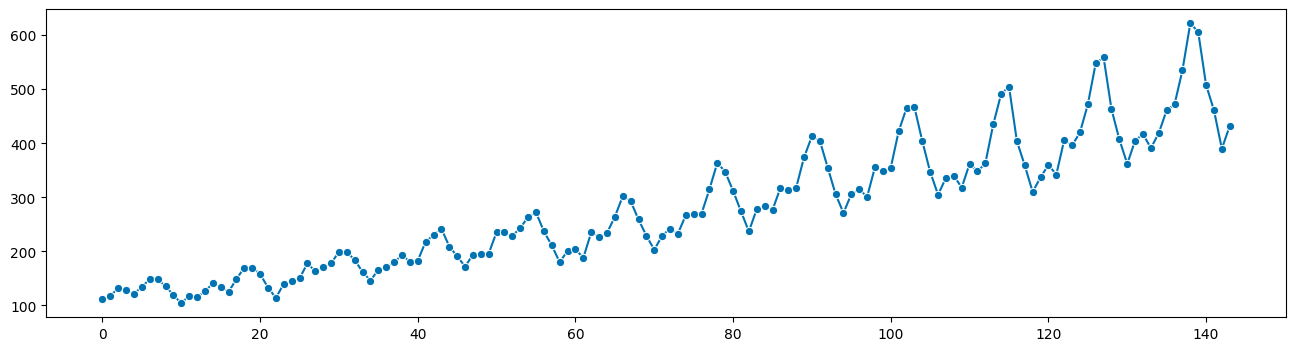

In [3]:
from aeon.datasets import load_airline
from aeon.visualisation import plot_series

airline = load_airline()
_ = plot_series(airline)

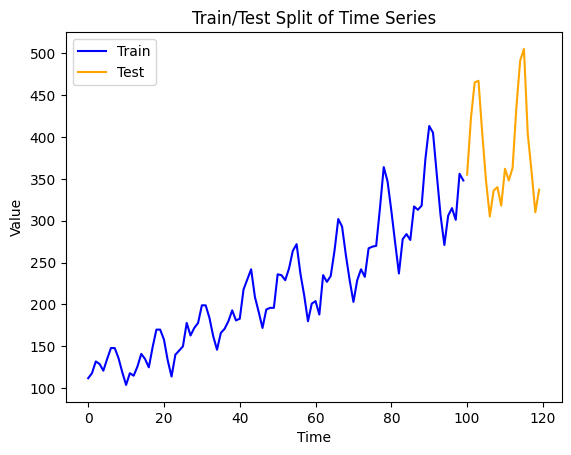

In [6]:
import matplotlib.pyplot as plt
import numpy as np

y_train = airline[:100]
y_test = airline[100:120]
plt.plot(np.arange(0, len(y_train)), y_train, label="Train", color="blue")
plt.plot(
    np.arange(len(y_train), len(y_train) + len(y_test)),
    y_test,
    label="Test",
    color="orange",
)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Train/Test Split of Time Series")
plt.show()

We want to train a forecaster on the train set and forecast predictions for the 
subsequent test steps. aeon forecasters have a single prediction. The 
`RegressionForecaster` is a window based forecaster that by default uses linear 
regression, 

In [7]:
from aeon.forecasting import RegressionForecaster

reg = RegressionForecaster(horizon=1, window=10)
reg.fit(y_train)
reg.predict()

array([376.10513466])